# *🎯 Customer Ad Click Prediction Using Classification Models*
* In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement.
* We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

**This dataset contains the following features:**

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.dpi'] = 200 #setting dpi to 200

---
---
## ❇️ DATA:


In [10]:
ad_data = pd.read_csv('advertising.csv')

In [11]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [12]:
ad_data.info()

#no null values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [13]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


---
---

## ❇️ EXPLORATORY DATA ANALYSIS (EDA):

**Age Wise Count of Potential Customers:**

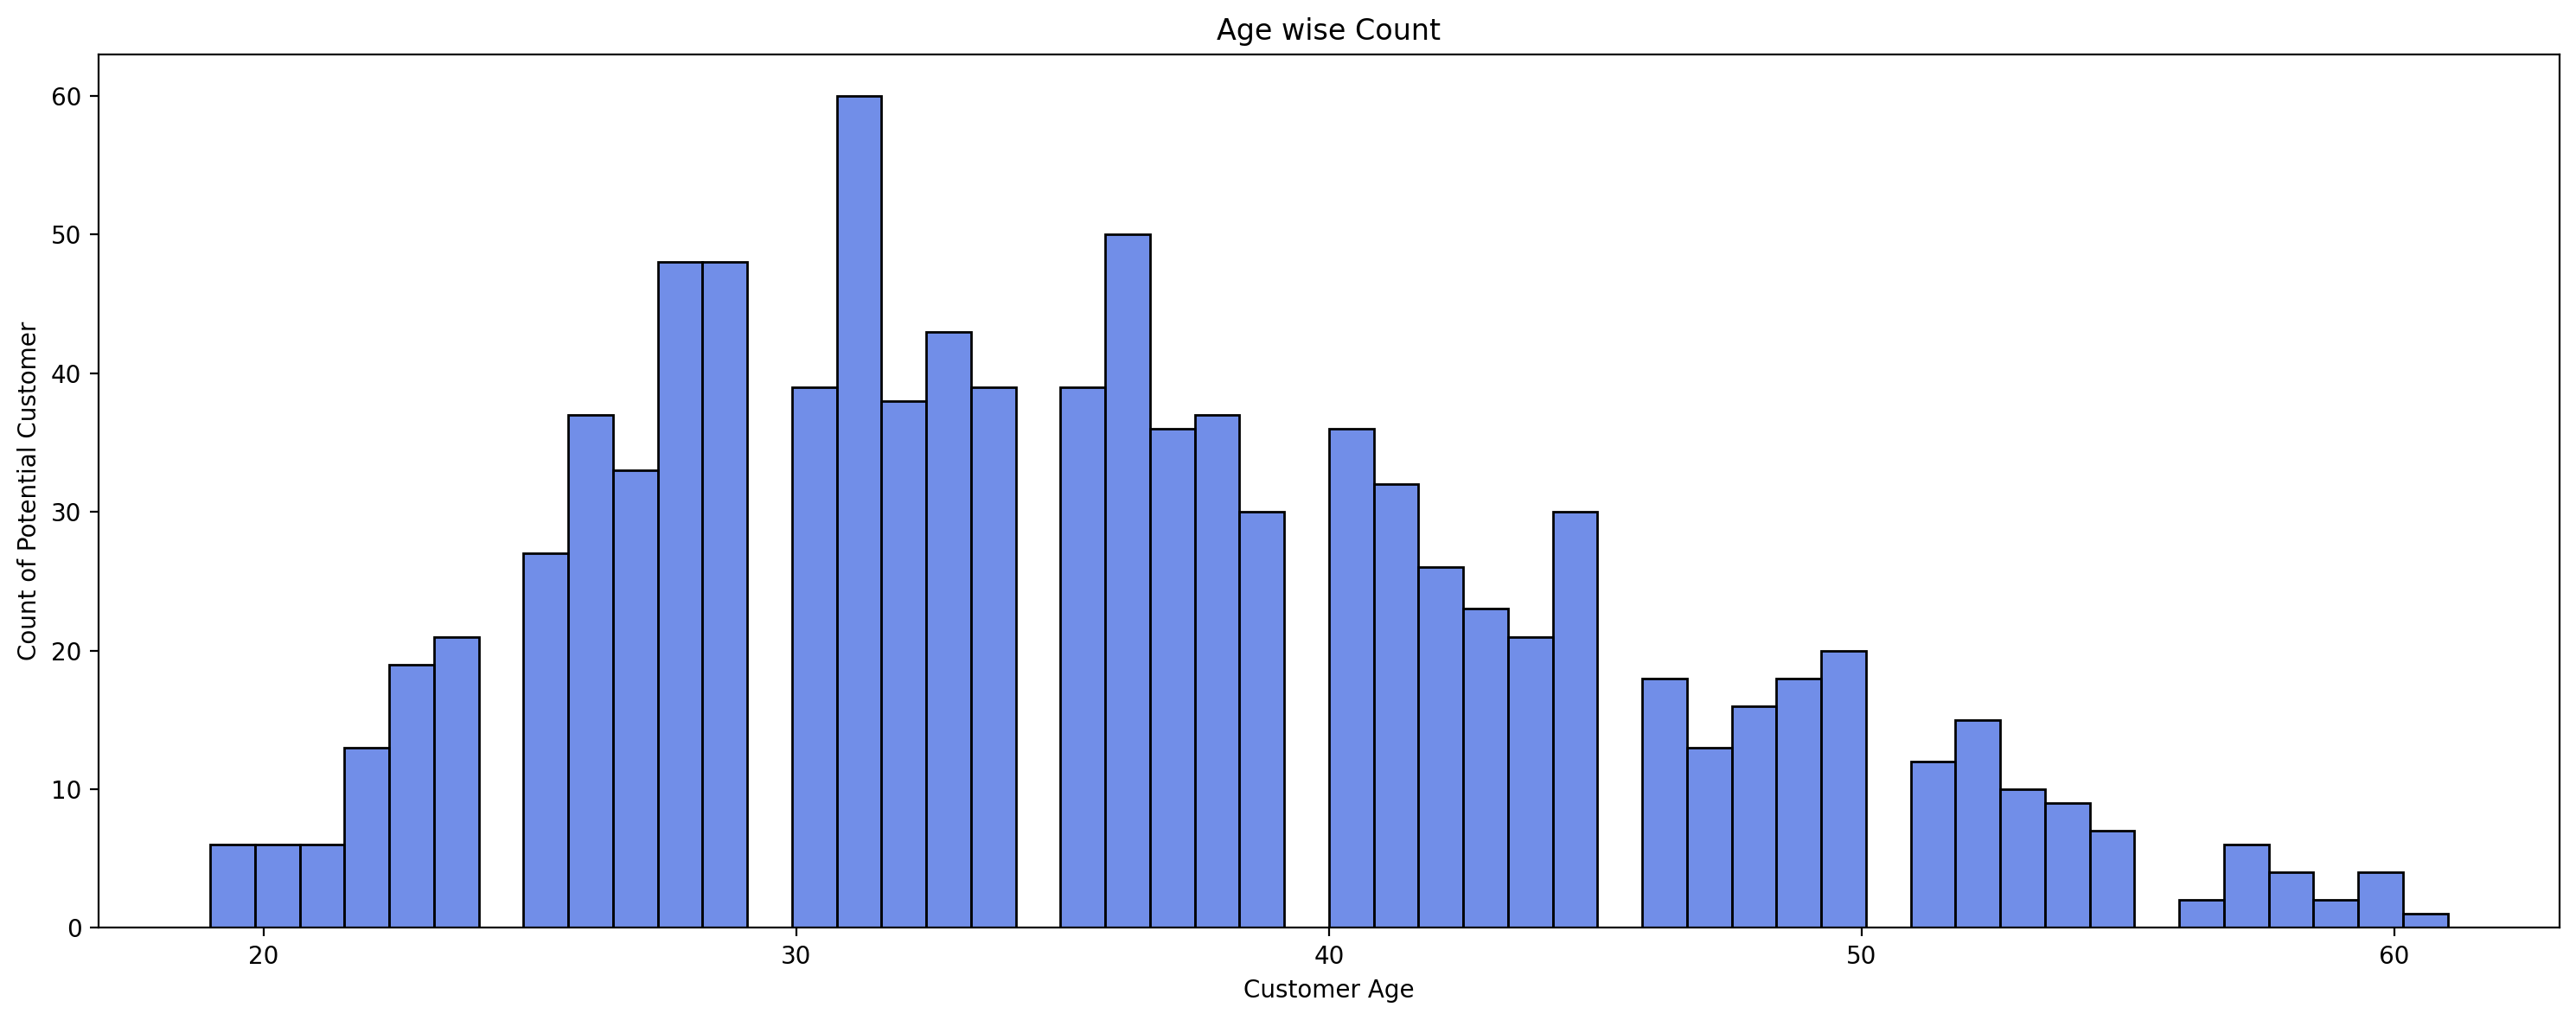

In [16]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'Age', data = ad_data, bins = 50, color = 'royalblue')
plt.xlabel('Customer Age')
plt.ylabel('Count of Potential Customer')
plt.title('Age wise Count')

plt.tight_layout()
plt.show()

**Jointplot showing Area Income versus Age:**

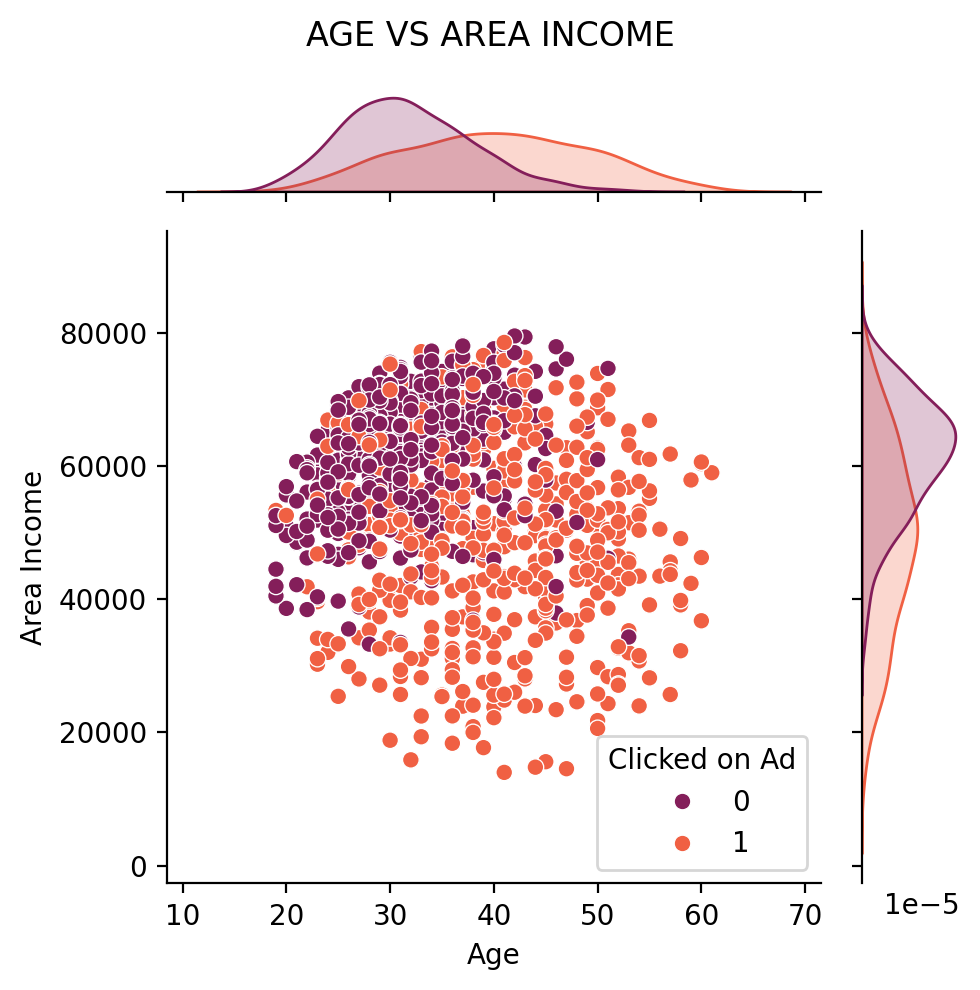

In [96]:
sns.jointplot(x = 'Age', y = 'Area Income' , data = ad_data, height = 5, hue = 'Clicked on Ad', palette = 'rocket')
plt.suptitle('AGE VS AREA INCOME')
plt.tight_layout()
plt.show()

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age:**

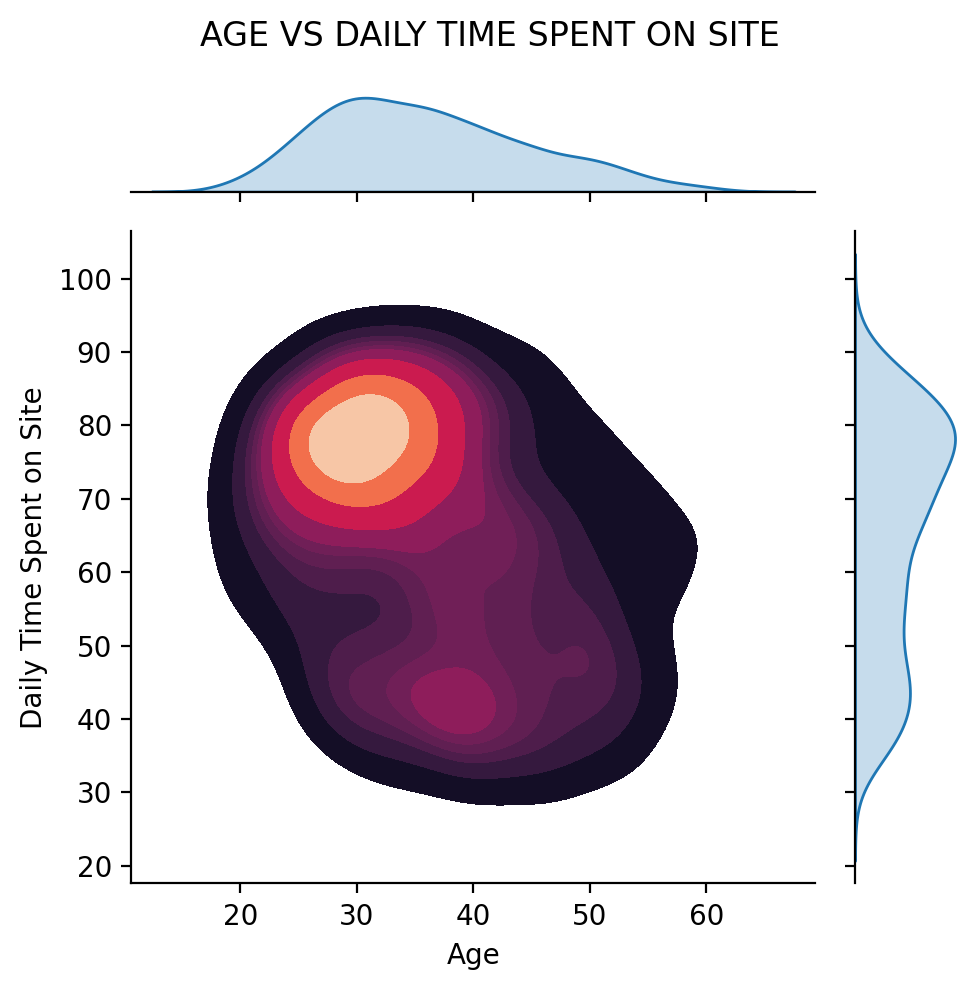

In [20]:
sns.jointplot(kind = 'kde', fill = True, x = 'Age', y = 'Daily Time Spent on Site', height = 5, data = ad_data, cmap = 'rocket')
plt.suptitle('AGE VS DAILY TIME SPENT ON SITE')
plt.tight_layout()
plt.show()

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage':**

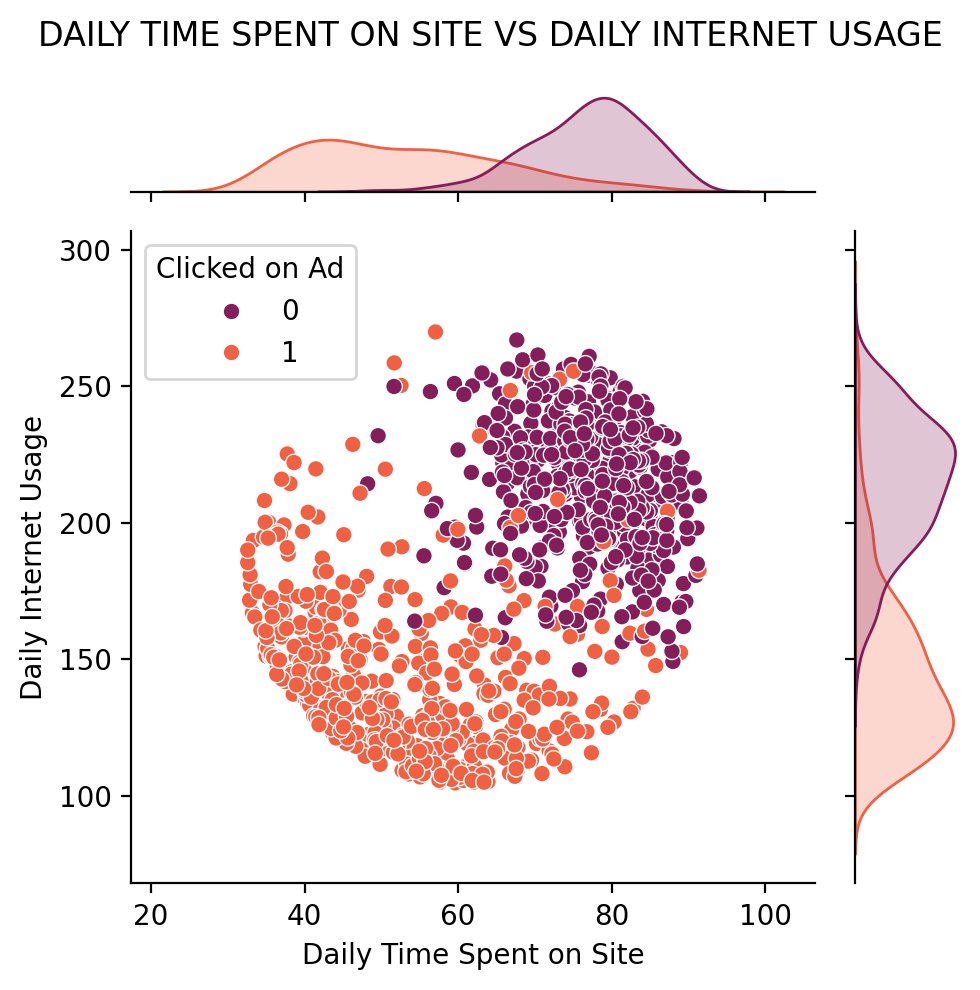

In [94]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, height = 5, hue = 'Clicked on Ad', palette = 'rocket' )
plt.suptitle('DAILY TIME SPENT ON SITE VS DAILY INTERNET USAGE')
plt.tight_layout()
plt.show()

**Pairplot with the hue defined by the 'Clicked on Ad' column feature:**

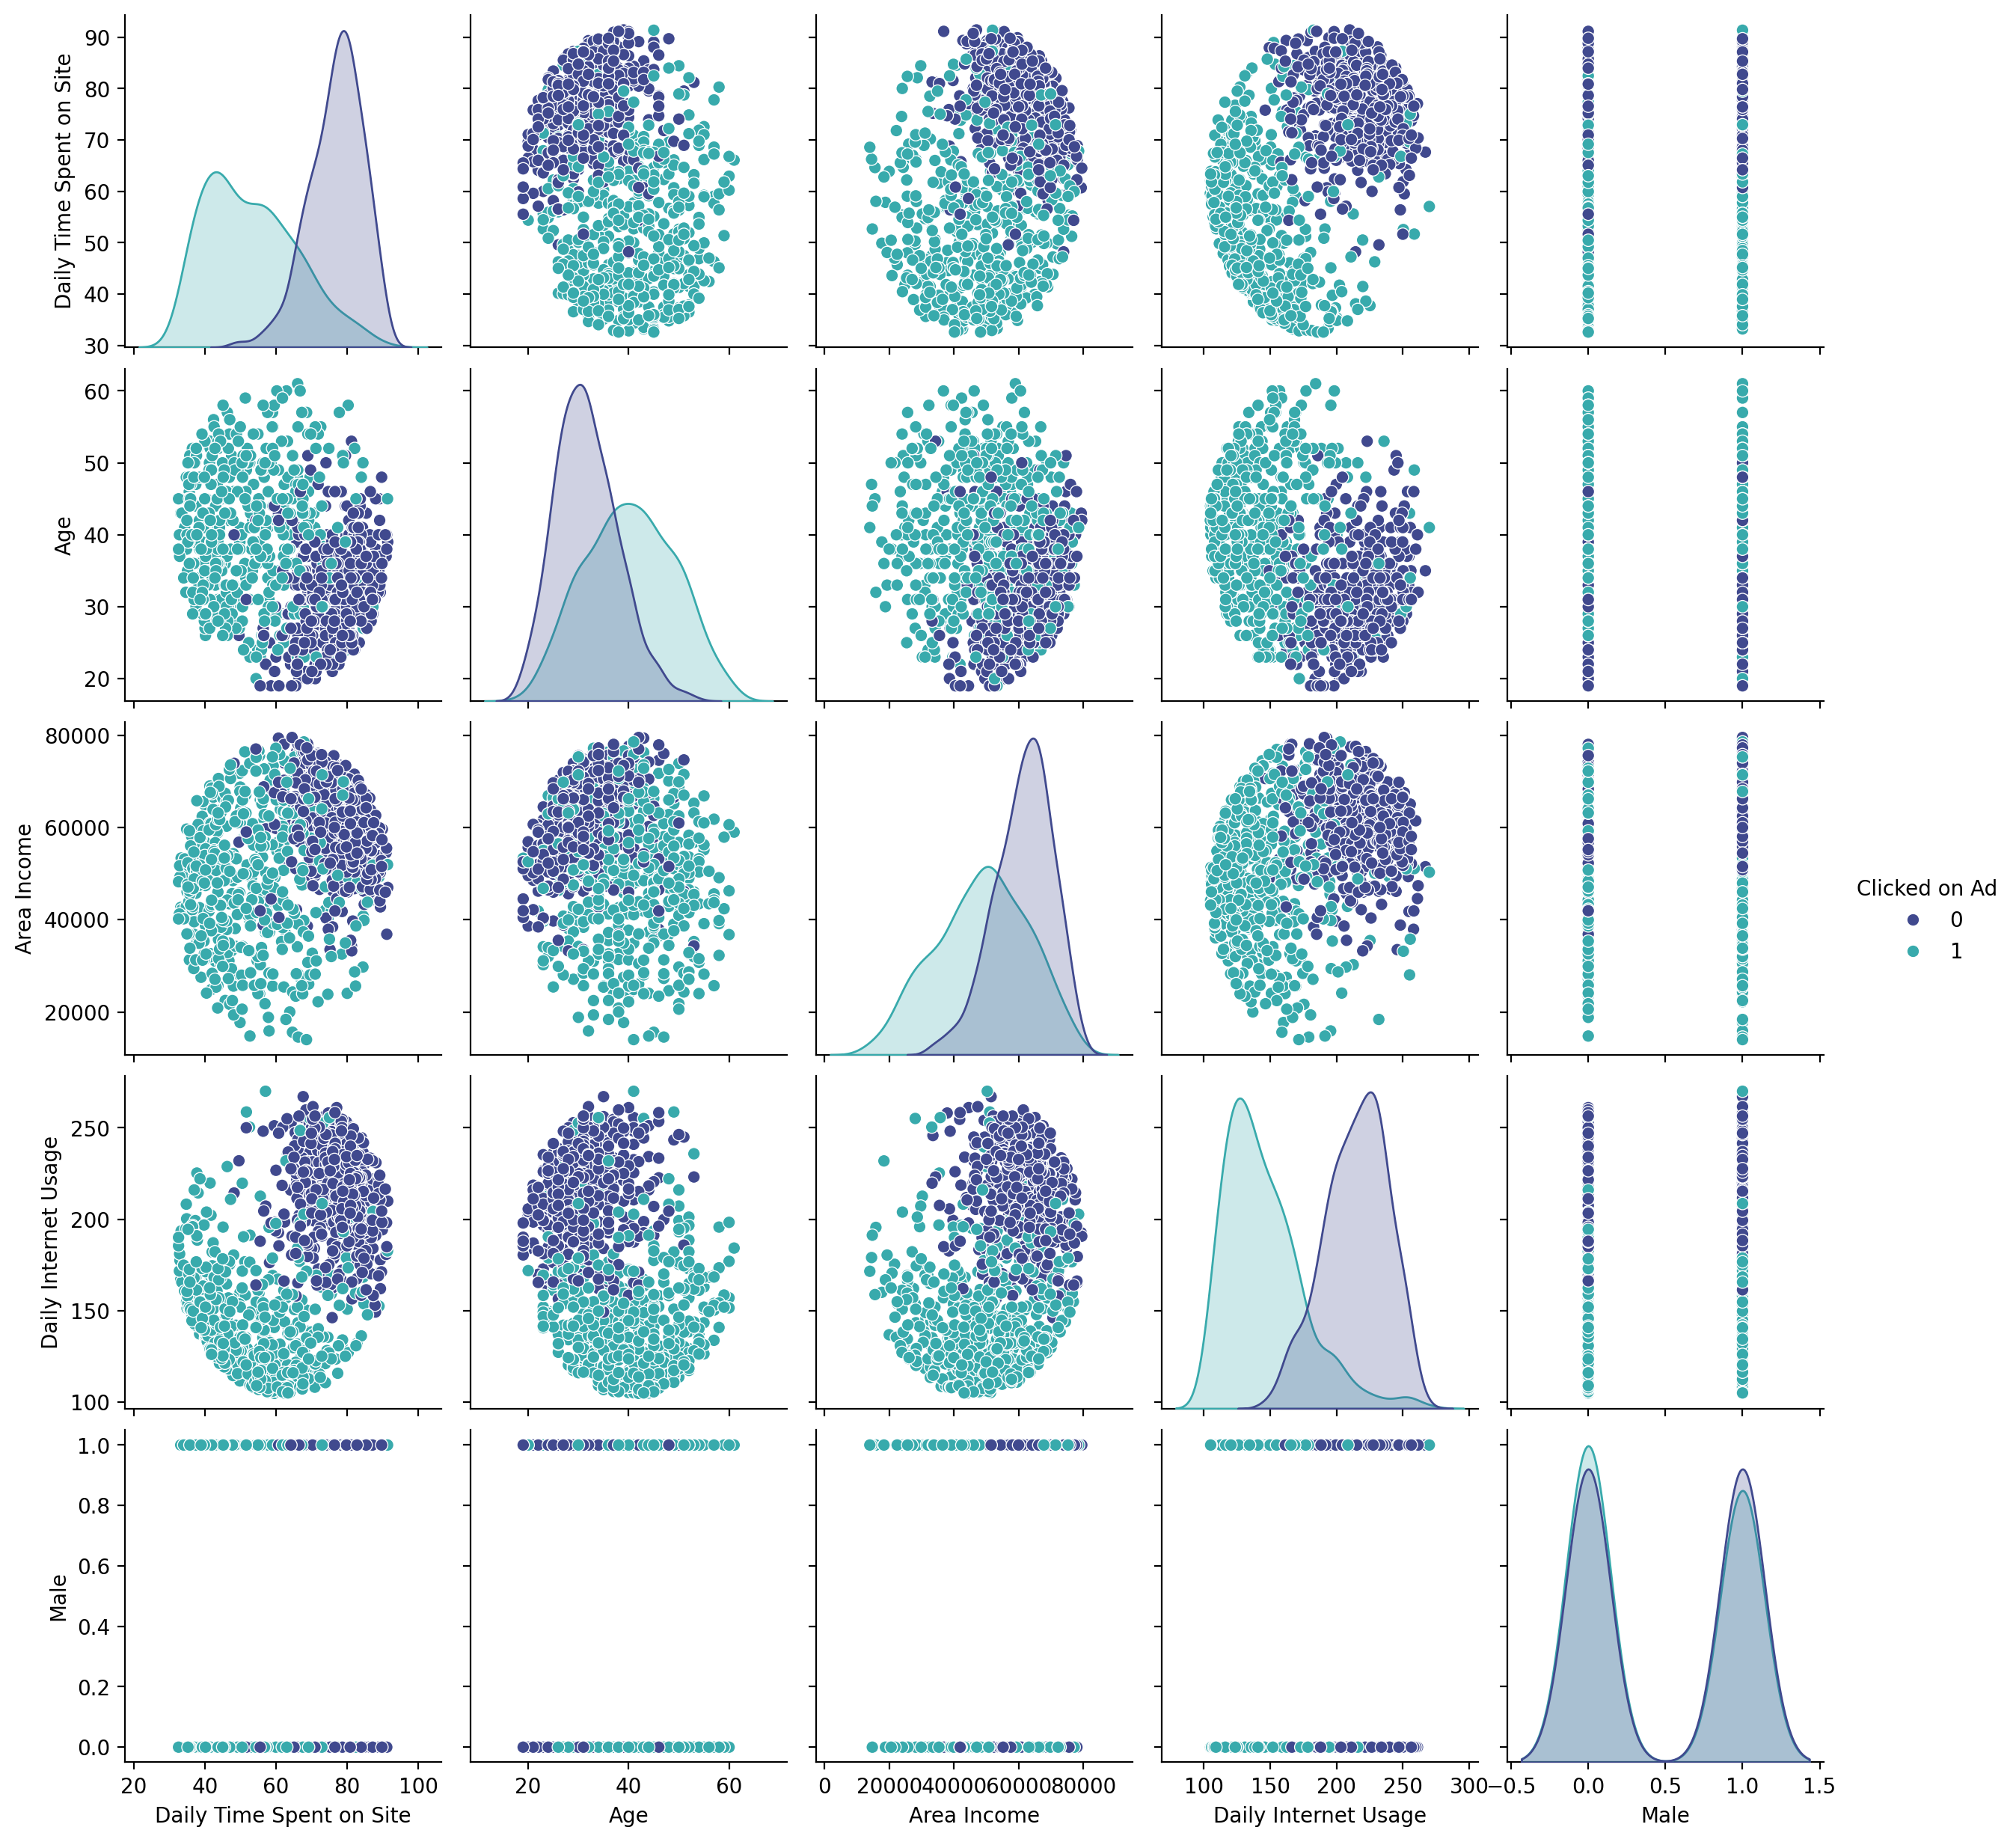

In [24]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', palette = 'mako')

plt.show()

---
---

## ❇️ TRAIN TEST SPLIT:

In [26]:
#Only utilized relevant features:
x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

---
---

# **🎯 LOGISTIC REGRESSION MODEL:**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions:

In [34]:
pred_logr = logmodel.predict(x_test)

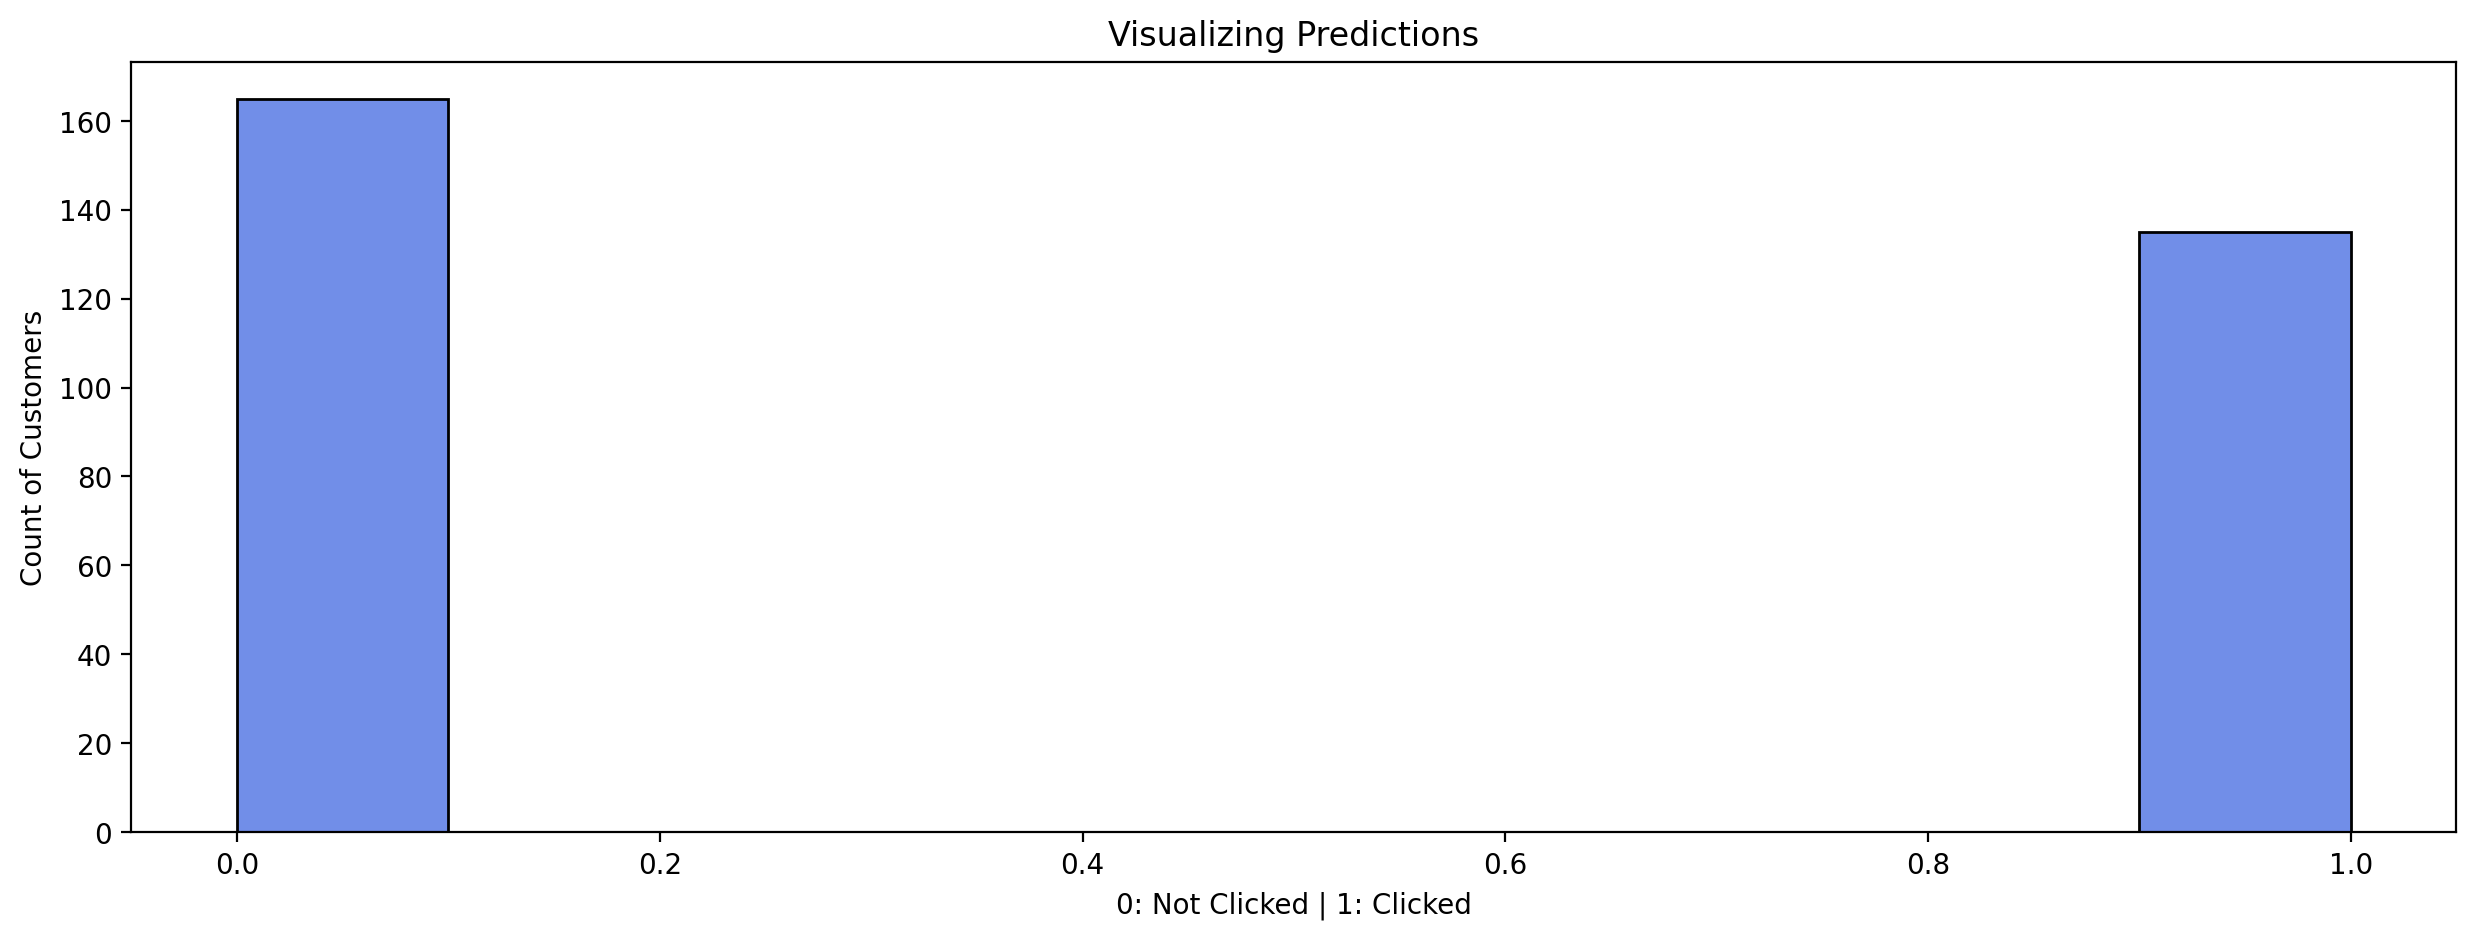

In [35]:
plt.figure(figsize = (15,5))
sns.histplot(pred_logr, color = 'royalblue')
plt.xlabel('0: Not Clicked | 1: Clicked')
plt.ylabel('Count of Customers')
plt.title('Visualizing Predictions')

plt.show()

### Model Evaluation:

**Importing classification_report and Confusion_Matrix**

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, pred_logr))
print('\n')
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test, pred_logr))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



CONFUSION MATRIX:
[[140   6]
 [ 25 129]]


---
---
# **🎯 APPLYING DECISION TREES MODEL:**

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()

In [43]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

### Predictions and Model Evaluation:

In [45]:
pred_dtc = dtc.predict(x_test)

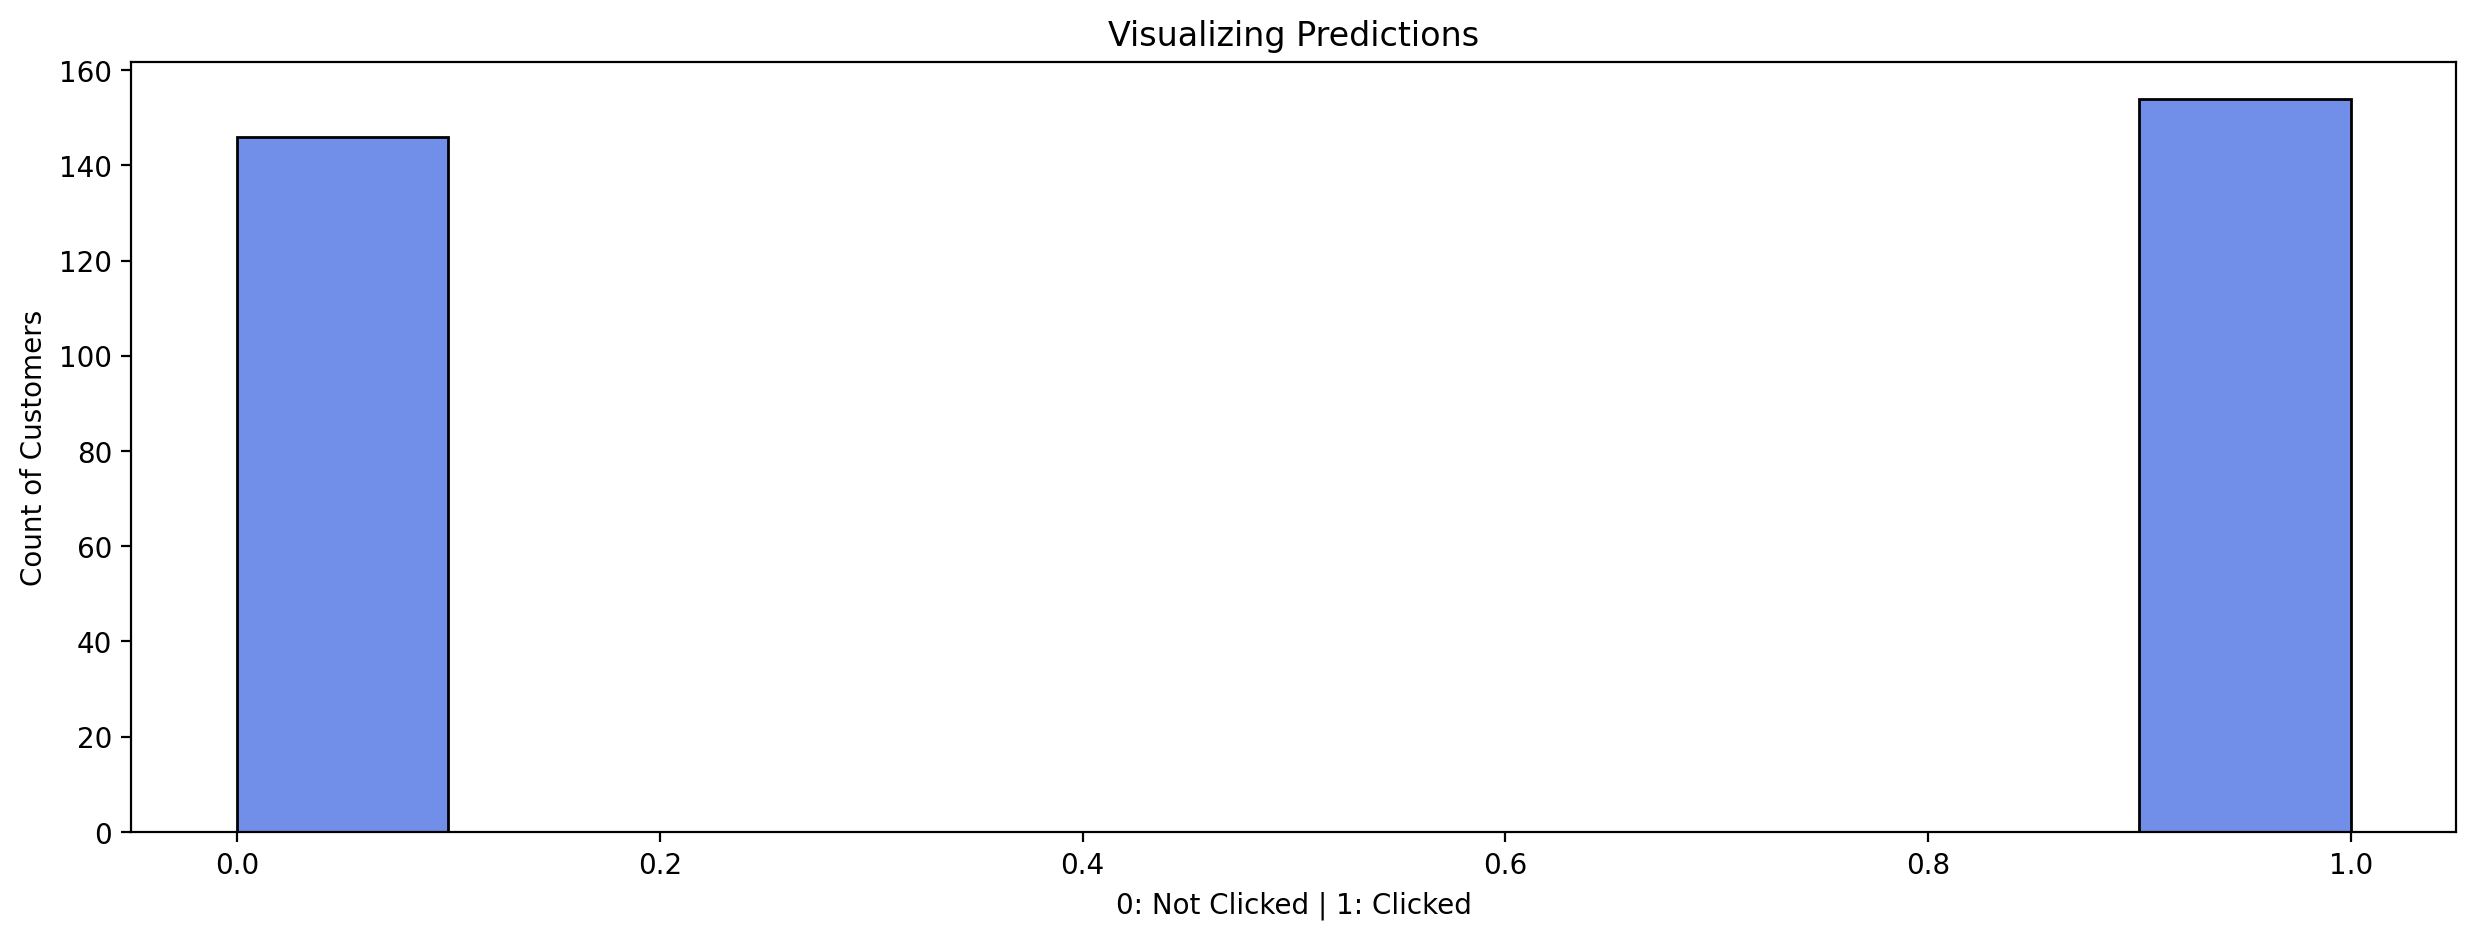

In [46]:
plt.figure(figsize = (15,5))
sns.histplot(pred_dtc, color = 'royalblue')
plt.xlabel('0: Not Clicked | 1: Clicked')
plt.ylabel('Count of Customers')
plt.title('Visualizing Predictions')

plt.show()

In [47]:
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, pred_dtc))
print('\n')
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test, pred_dtc))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.94      0.94      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



CONFUSION MATRIX:
[[137   9]
 [  9 145]]


---
---
# **🎯 APPLYING RANDOM FOREST MODEL:**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators = 100)

In [51]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

### Predictions:

In [53]:
pred_rfc = rfc.predict(x_test)

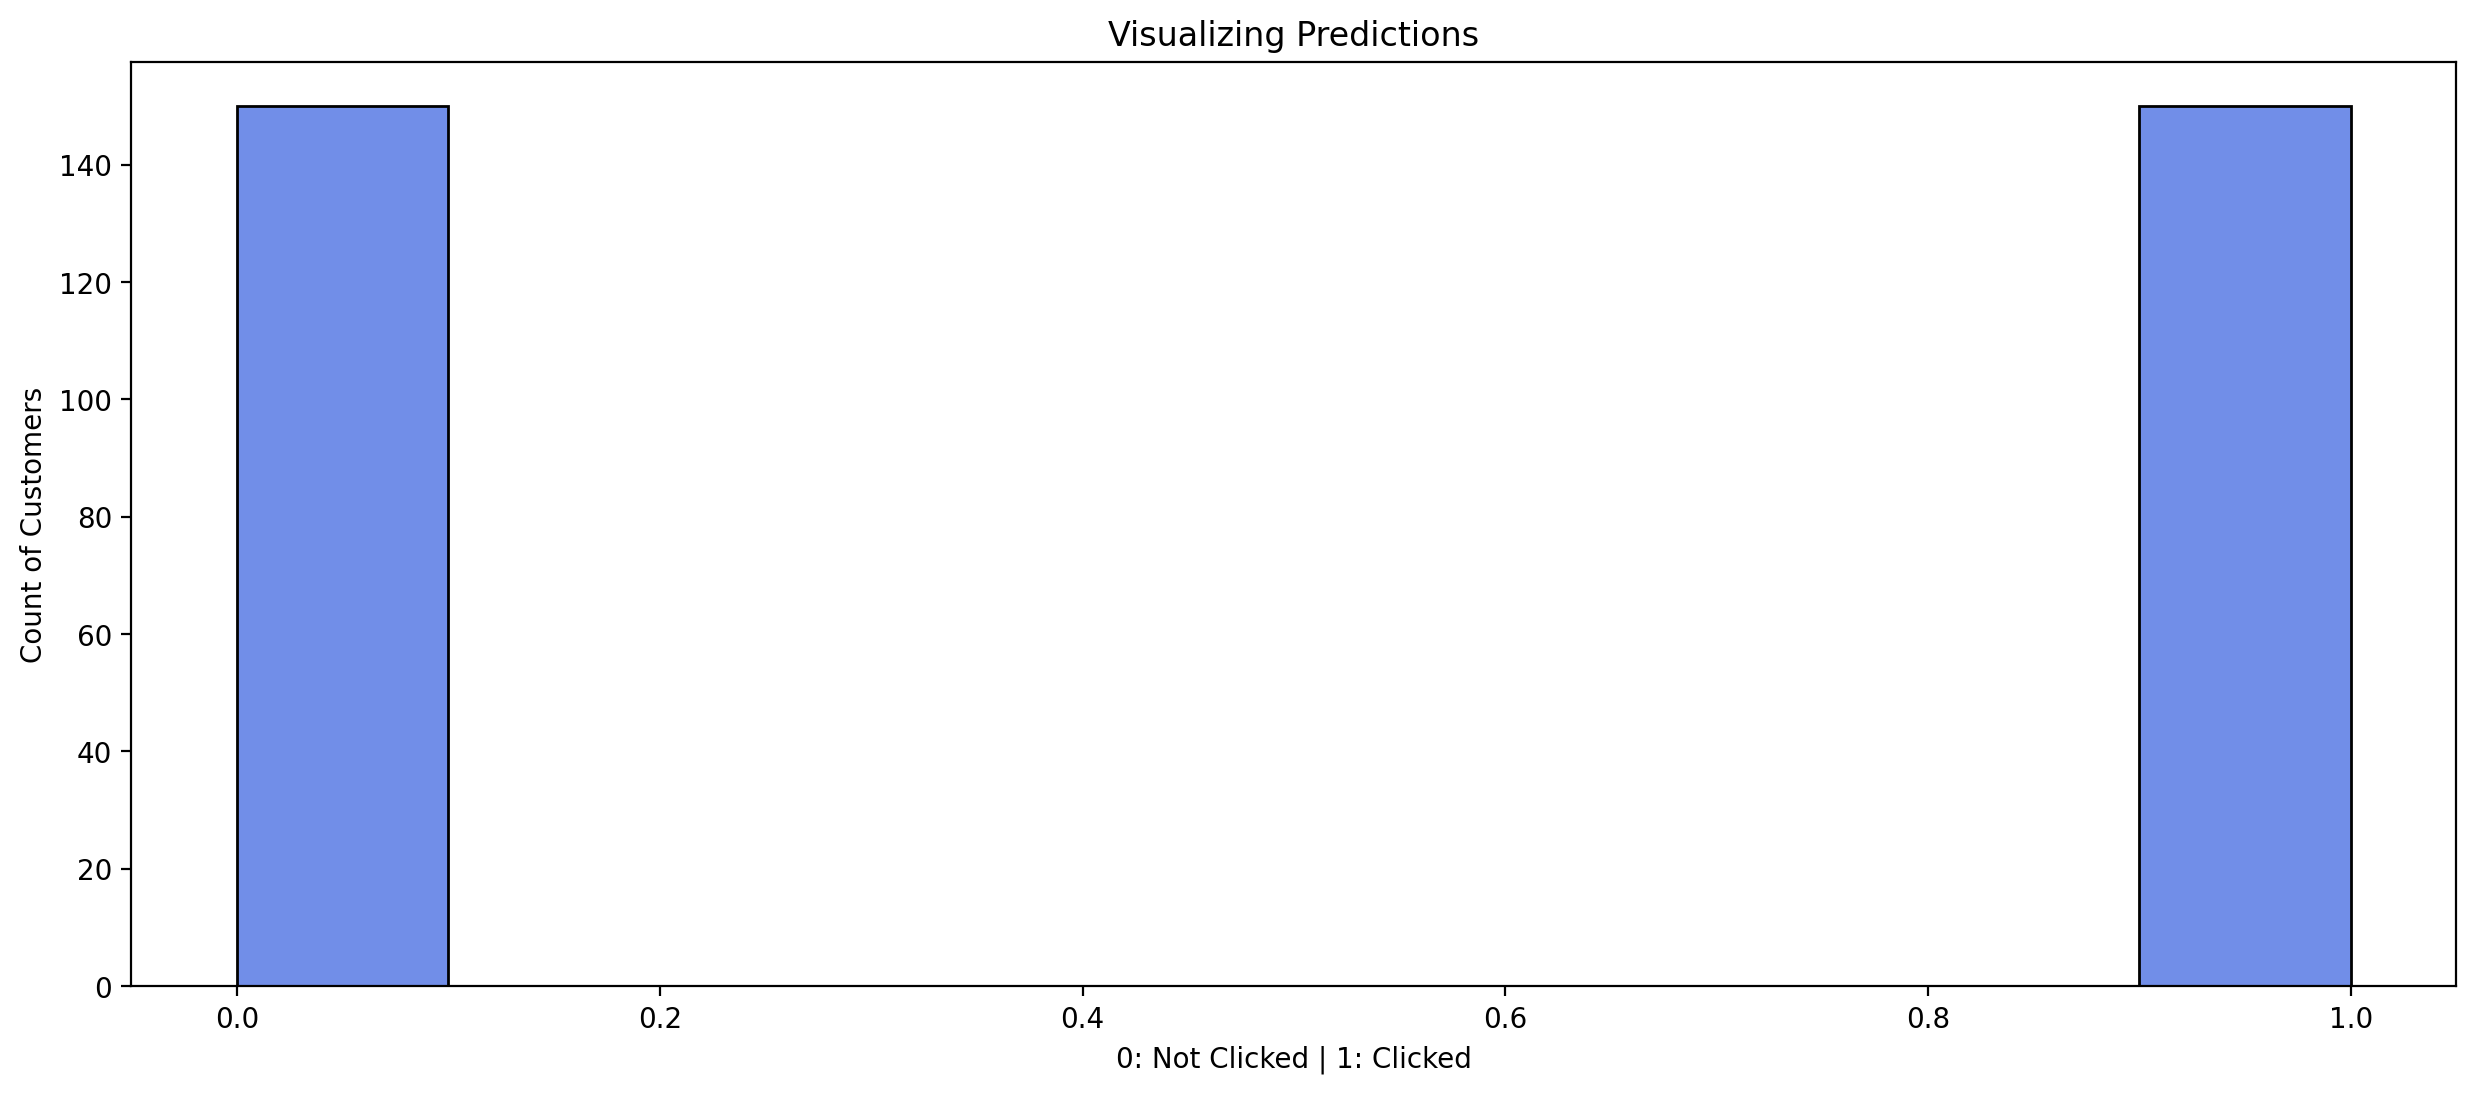

In [54]:
plt.figure(figsize = (15,6))
sns.histplot(pred_rfc, color = 'royalblue')
plt.xlabel('0: Not Clicked | 1: Clicked')
plt.ylabel('Count of Customers')
plt.title('Visualizing Predictions')

plt.show()

In [55]:
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, pred_rfc))
print('\n')
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test, pred_rfc))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       146
           1       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



CONFUSION MATRIX:
[[141   5]
 [  9 145]]


---
---

# 📊 Comparative Evaluation of Models:

To find the best way to predict whether a customer will click on an ad, we tried three different machine learning models: **Logistic Regression, Decision Tree, and Random Forest**. Here’s how they stacked up:

| Metric                | Logistic Regression | Decision Tree | Random Forest |
|------------------------|--------------------|---------------|---------------|
| **Accuracy**           | 0.90                | 0.93          | 0.96          |
| **Precision (Class 1)** | 0.96                | 0.94          | 0.97          |
| **Recall (Class 1)**    | 0.84                | 0.93          | 0.95          |
| **F1-Score (Class 1)**  | 0.89                | 0.93          | 0.96          |

---

### ✍️ Learnings:
- **Logistic Regression** did a decent job overall, with 90% accuracy, but it struggled a bit with recall. This means it missed more actual ad clickers, which could lead to missed marketing opportunities.

- **Decision Tree** captured the patterns better, improving both recall and overall accuracy to 93%.

- **Random Forest** clearly stood out. By combining the decisions of many trees, it achieved the highest accuracy at 96% and balanced precision and recall beautifully. This means it did the best job identifying customers likely to click on ads without too many false positives.

---

### ✅ Key takeaway
Given the strong, consistent performance of the **Random Forest**, we chose it as our final model. It provides reliable predictions, helping us better understand and target customers who are most likely to engage with advertisements. This can directly support smarter ad spending and higher conversion rates.

---
---
# END